<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="img/header.png" alt="Dashboards con Python" style="width: 100%;">
</div>

| Curso oficial por: |
|---------|
|![](img/logo_see_2.png) | 

# Título del Documento

| Nombre: | Fecha: | Tema: | Objetivos: |
|---------|--------|-------|-----------|
| Nombre del presentador | 6 de abril de 2023 | Tema de la presentación | 
- Objetivo 1
- Objetivo 2
- Objetivo 3

# Título del Documento

| **Nombre:** | **Fecha:** | **Tema:** | **Objetivos:** |
|-------------|------------|-----------|----------------|
| Nombre del presentador | 6 de abril de 2023 | Tema de la presentación | 
| - Objetivo 1 | 
| - Objetivo 2 | 
| - Objetivo 3 | 

# Título del Documento
---

| **Nombre:** | **Fecha:** | **Tema:** | **Objetivos:** |
|:------------|:----------|:---------|:---------------|
| Nombre del presentador | 6 de abril de 2023 | **Tema de la presentación** | 
| - *Objetivo 1* | 
| - *Objetivo 2* | 
| - *Objetivo 3* | 

# **Curso:** Construcción de Índices con Análisis Multivariante

## **Descripción:**
El presente documento sirve para la aprobación del curso sobre Construcción de Índices con Análisis Multivariante.

## **Contenido:**

* Librerías a emplearse
* Lectura de la base de datos
* Descripción de la base de datos
* Perfilamiento de variables
* KMO
* Gráfico de Factores
* Matriz de Componentes Rotados
* Comunalidades
* Análisis de la Varianza
* Selección de Factores
* Resultados del AF

## **Fecha de elaboración:**

* 26 de marzo de 2023

## **Lenguaje de programación:**

* Python 3.10

## **Desarrollado por:**

* Ing. Marcelo Chávez

#### **1. Librerías a utilizar:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings('ignore')

#### **2. Lectura de la base de datos fuente:**

Para el presente ejercicio se ha utilizado el data set de Kaggle: **COVID-19 effect on Pollution**

In [2]:
db_pollution = pd.read_csv(r"C:\Users\marcelochavez\Documents\INDICES_INDICADORES\db\station_day.csv",
                         dtype={"Outcome":str})
db_pollution

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99716,WB013,2020-04-27,11.51,31.71,1.73,10.21,11.93,21.52,0.54,6.92,28.90,1.33,8.96,NaN,38.0,Good
99717,WB013,2020-04-28,9.38,33.70,1.77,12.39,14.15,22.44,0.64,6.09,26.34,1.35,9.47,NaN,39.0,Good
99718,WB013,2020-04-29,16.86,32.17,2.00,14.26,16.27,24.19,0.57,7.27,29.62,1.66,10.45,NaN,44.0,Good
99719,WB013,2020-04-30,15.17,32.10,2.02,12.40,14.41,25.58,0.61,11.53,33.93,0.96,8.92,NaN,46.0,Good


In [3]:
print("El nro de registros del data set es:", db_pollution.shape[0])
print("El nro de variables del data set es:", db_pollution.shape[1])

El nro de registros del data set es: 99721
El nro de variables del data set es: 16


#### **3. Descripción de la base de datos:**
#### **About this Dataset**
#### **Context**

Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being.

#### **Content**

The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.

A tutorial of how AQI is calculated is available here: https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index

#### **Cities**

Ahmedabad Aizawl Amaravati Amritsar Bengaluru Bhopal Brajrajnagar Chandigarh Chennai Delhi Ernakulam Gurugram Guwahati Hyderabad Jaipur Jorapokhar Kochi Kolkata Lucknow Mumbai Patna Shillong Talcher Thiruvananthapuram
Acknowledgements

The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of

#### **Fuente**
URL: https://www.kaggle.com/code/parulpandey/breathe-india-covid-19-effect-on-pollution/notebook

#### **3. Perfilamiento de variables:**

In [4]:
def perfilamiento(df):
    # Catálogo de variables:
    catalogo_variables = pd.DataFrame(df.dtypes).rename(columns={0:'tipo_variable'})
    catalogo_variables['len_max'] = [columnData.str.len().max() if columnData.dtype == object else columnData.max() for columnName, columnData in df.items()]
    catalogo_variables['len_min'] = [columnData.str.len().min() if columnData.dtype == object else columnData.min() for columnName, columnData in df.items()]
    catalogo_variables = pd.concat([catalogo_variables, df.isnull().sum()], axis=1).rename(columns={0:'absoluto_missing'})
    catalogo_variables = catalogo_variables.loc[catalogo_variables.index != "Unnamed: 0"]
    porcentaje_missing = pd.DataFrame(((df.isnull().sum() / len(df))*100).round(2))
    porcentaje_missing = porcentaje_missing.loc[porcentaje_missing.index != "Unnamed: 0"].rename(columns={0:"porcentaje_missing"})
    # selección de las columnas numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    # resumen estadístico descriptivo de las columnas numéricas
    resumen_estadistico = df[num_cols].describe().round(2)    
    # cálculo de la correlación de las columnas numéricas
    corr_matrix = df[num_cols].corr()
    catalogo_variables = pd.concat([catalogo_variables, porcentaje_missing], ignore_index=False, axis=1)
    return  catalogo_variables, resumen_estadistico, corr_matrix

catalogo_variables, resumen_estadistico, corr_matrix = perfilamiento(db_pollution)

#### **Tipo de variable y missings:**

In [5]:
catalogo_variables

,tipo_variable,len_max,len_min,absoluto_missing,porcentaje_missing
StationId,object,5.00,5.00,0,0.00
Date,object,10.00,10.00,0,0.00
PM2.5,float64,1000.00,0.02,20737,20.80
PM10,float64,1000.00,0.01,41021,41.14
NO,float64,470.00,0.01,16277,16.32
NO2,float64,448.05,0.01,15764,15.81
NOx,float64,467.63,0.00,14915,14.96
NH3,float64,418.90,0.01,45811,45.94
CO,float64,175.81,0.00,12491,12.53
SO2,float64,195.65,0.01,23977,24.04


**ANÁLISIS DE MISSING VALUES:** Todas las variables que miden la contaminación del aire presentan valores perdidos, para lo cual se proceder a eliminar todos los registros que tienen missing values. En la siguiente línea se encuentra dicho proceso:

In [6]:
db_pollution_new = db_pollution.copy().dropna()
print("El nro de registros del data set es:", db_pollution_new.shape[0])
print("El nro de variables del data set es:", db_pollution_new.shape[1])

El nro de registros del data set es: 8430
El nro de variables del data set es: 16


In [7]:
catalogo_variables, resumen_estadistico, corr_matrix = perfilamiento(db_pollution_new)

In [8]:
catalogo_variables

,tipo_variable,len_max,len_min,absoluto_missing,porcentaje_missing
StationId,object,5.00,5.00,0,0.0
Date,object,10.00,10.00,0,0.0
PM2.5,float64,734.56,1.31,0,0.0
PM10,float64,830.10,5.77,0,0.0
NO,float64,262.00,0.10,0,0.0
NO2,float64,254.78,0.10,0,0.0
NOx,float64,331.50,0.02,0,0.0
NH3,float64,269.93,0.10,0,0.0
CO,float64,4.74,0.00,0,0.0
SO2,float64,67.26,0.10,0,0.0


#### **Análisis Exploratorio de variables:**

In [9]:
resumen_estadistico

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,8430.00,8430.00,8430.00,8430.00,8430.00,8430.00,8430.00,8430.00,8430.00,8430.00,8430.00,8430.00,8430.00
mean,55.31,111.85,12.57,34.19,31.25,18.15,0.70,9.53,31.51,4.65,12.77,2.90,123.80
std,45.50,70.06,20.25,23.75,30.02,13.04,0.45,7.84,18.25,14.79,25.83,7.61,78.25
min,1.31,5.77,0.10,0.10,0.02,0.10,0.00,0.10,0.03,0.00,0.00,0.00,19.00
25%,27.45,64.83,2.59,15.47,12.97,9.94,0.42,4.00,18.83,0.18,1.20,0.10,74.00
50%,46.26,101.63,6.12,28.99,22.75,15.19,0.62,7.47,28.22,1.12,4.07,0.70,107.00
75%,68.41,141.58,12.99,48.41,38.24,23.43,0.89,12.39,40.77,3.63,12.92,2.68,142.00
max,734.56,830.10,262.00,254.78,331.50,269.93,4.74,67.26,138.18,165.41,259.03,133.60,692.00


#### **Coeficiente de variación:**

In [10]:
def coef_variacion(df):
    # selecciona solo las columnas numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    des_std = df[num_cols].std()/df[num_cols].mean()
    return des_std

In [11]:
coef_variacion(db_pollution_new)

PM2.5      0.822619
PM10       0.626413
NO         1.610619
NO2        0.694618
NOx        0.960550
NH3        0.718350
CO         0.647255
SO2        0.822019
O3         0.579173
Benzene    3.181601
Toluene    2.022600
Xylene     2.621274
AQI        0.632106
dtype: float64

#### **Análisis del CV:** De la revisión del CV se observan variables que tienen mayor dispersión (de -1 a 1): **NO, Benzene, Toluene, y Xylene**, por lo cual serán excluidos del análisis

#### **Matriz de Correlación:**

In [12]:
corr_matrix

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.899029,0.477051,0.549542,0.553259,0.347301,0.612865,0.189603,-0.024981,0.103686,0.222077,0.132979,0.919838
PM10,0.899029,1.000000,0.466039,0.560939,0.563885,0.342937,0.586988,0.224109,-0.022058,0.115193,0.237397,0.157813,0.908759
NO,0.477051,0.466039,1.000000,0.432057,0.874927,0.236836,0.520822,-0.006125,-0.216404,0.433082,0.378883,0.178278,0.490139
NO2,0.549542,0.560939,0.432057,1.000000,0.704155,0.331459,0.464276,0.125957,-0.015600,0.103471,0.346232,0.251379,0.543730
NOx,0.553259,0.563885,0.874927,0.704155,1.000000,0.301988,0.573869,0.037567,-0.163291,0.426687,0.427640,0.226008,0.586693
NH3,0.347301,0.342937,0.236836,0.331459,0.301988,1.000000,0.275159,0.199884,-0.059098,0.090257,0.054423,0.028464,0.355752
CO,0.612865,0.586988,0.520822,0.464276,0.573869,0.275159,1.000000,0.102803,-0.070788,0.218287,0.274064,0.167609,0.614860
SO2,0.189603,0.224109,-0.006125,0.125957,0.037567,0.199884,0.102803,1.000000,0.179632,-0.039887,0.093414,0.086383,0.188907
O3,-0.024981,-0.022058,-0.216404,-0.015600,-0.163291,-0.059098,-0.070788,0.179632,1.000000,-0.106756,-0.074450,-0.034643,0.013340
Benzene,0.103686,0.115193,0.433082,0.103471,0.426687,0.090257,0.218287,-0.039887,-0.106756,1.000000,0.685674,0.154776,0.138371


#### **4. Cálculo del KMO:**

#### **4.1 Selección para el cálculo del KMO previo al Análisis Factorial:**

In [13]:
db_pollution_new.columns
var_seleccion = ['PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
db_pollution_selec = db_pollution_new[var_seleccion]
db_pollution_selec

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3
1,81.40,124.50,20.50,12.08,10.72,0.12,15.24,127.09
2,78.32,129.06,26.00,14.85,10.28,0.14,26.96,117.44
3,88.76,135.32,30.85,21.77,12.91,0.11,33.59,111.81
4,64.18,104.09,28.07,17.01,11.42,0.09,19.00,138.18
5,72.47,114.84,23.20,16.59,12.25,0.16,10.55,109.74
...,...,...,...,...,...,...,...,...
98073,80.93,174.84,56.74,139.70,29.32,1.18,9.36,15.96
98074,103.75,217.89,63.28,181.55,27.56,1.71,11.43,24.75
98075,115.40,225.76,70.41,213.77,35.25,2.11,10.49,22.11
98076,97.37,179.87,64.34,169.46,36.24,1.51,6.90,12.55


In [14]:
# selección de las columnas numéricas
num_cols = db_pollution_new.select_dtypes(include=['float64', 'int64']).columns.tolist()
db_diabetes_new = db_pollution[num_cols].copy()    

#### **5. Cálculo del KMO:**

##### KMO

In [15]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(db_pollution_selec)
print(kmo_model.round(2))

0.78


##### Test de Barlett

In [16]:
# Barlett's
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(db_pollution_selec)

(31773.710774973093, 0.0)

**ANÁLISIS DEL KMO:** Dado que el valor del KMO es estadísticamente significativo, esto nos indica que las variables seleccionadas del data frame son aptas para realizar un AF

#### **6. Análisis Gráfico de los Factores:**

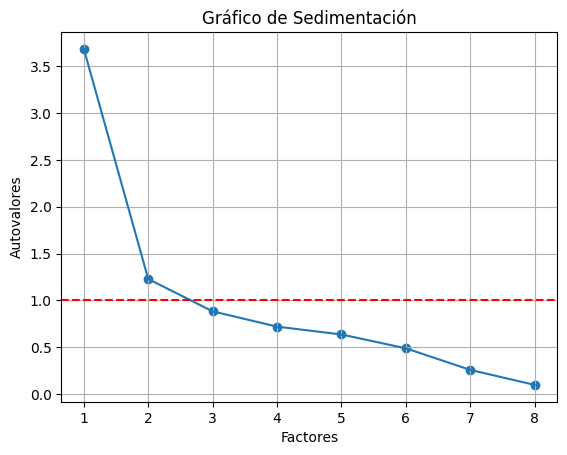

In [17]:
fa = FactorAnalyzer(rotation=None, n_factors=len(db_pollution_selec.columns))
fa.fit(db_pollution_selec)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

plt.scatter(range(1,db_pollution_selec.shape[1]+1),ev)
plt.plot(range(1,db_pollution_selec.shape[1]+1),ev)
plt.title('Gráfico de Sedimentación')
plt.xlabel('Factores')
plt.ylabel('Autovalores')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

**ANÁLISIS DEL GRÁFICO DE SEDIMENTACIÓN:** En el gráfico se puede observar que máximo en dos dimensiones se puede resumir la varianza de las variables originales.

#### **7. Matriz de Componentes Rotados con el Método Varimax**

In [18]:
fa = FactorAnalyzer(rotation="varimax", n_factors=2)
fa.fit(db_pollution_selec)

# Check loadings
loadings = pd.DataFrame(fa.loadings_)
loadings.rename(columns = lambda x: 'Dimensión-' + str(x + 1), inplace=True)
loadings.index = db_pollution_selec.columns
loadings

,Dimensión-1,Dimensión-2
PM2.5,0.926310,0.057106
PM10,0.933908,0.050690
NO2,0.591678,0.419971
NOx,0.559260,0.828554
NH3,0.394735,0.112495
CO,0.618897,0.276618
SO2,0.267926,-0.155719
O3,0.017911,-0.220189


**ANÁLISIS DEL MÉTODO DE ROTACIÓN VARIMAX:** Los loadings son una medida importante en el análisis factorial porque permiten identificar qué variables están más estrechamente relacionadas con cada factor.

#### **8. Comunalidades**

In [19]:
communalities = fa.get_communalities()
communalities = pd.DataFrame(communalities, index=db_pollution_selec.T.index, columns=['Comunalidades'])
communalities.sort_values(by=['Comunalidades'], ascending=True).head(8)

,Comunalidades
O3,0.048804
SO2,0.096032
NH3,0.168471
CO,0.459551
NO2,0.526459
PM2.5,0.861312
PM10,0.874754
NOx,0.999272


**ANÁLISIS DE LAS COMUNALIDADES:** Las comunalidades representan la cantidad de información en cada variable que se comparte con los demás factores. En este sentido, las comunalidades de **PM2.5** (86%), **PM10** (87%), **NOx** (0.99%) indican la proporción de la varianza explicado por los factores extraídos en el AF.

#### **9. Análisis de la Varianza en cada Factor**

In [20]:
factorVarianza = pd.DataFrame(fa.get_factor_variance()).round(2)
factorVarianza.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
factorVarianza.index = ['SS Loadings', 
                        'Proportion Variance',
                        'Cumulative Variance']
factorVarianza

,Factor-1,Factor-2
SS Loadings,3.00,1.03
Proportion Variance,0.38,0.13
Cumulative Variance,0.38,0.50


#### **10. Selección de Factores según el nivel de varianza**

In [24]:
def color_factor_importance(val):
    if np.abs(val) > 0.7:
        color = 'green'
    elif np.abs(val) > 0.5 and np.abs(val) < 0.7:
        color = 'blue'
    else: 
        color = 'red'
    return 'color: %s' % color

In [27]:
loadings.style.applymap(color_factor_importance)

,Dimensión-1,Dimensión-2
PM2.5,0.926310,0.057106
PM10,0.933908,0.050690
NO2,0.591678,0.419971
NOx,0.559260,0.828554
NH3,0.394735,0.112495
CO,0.618897,0.276618
SO2,0.267926,-0.155719
O3,0.017911,-0.220189


#### **11. Resultados del AF en las variables de la base de contaminación atmosférica**

**CONSIDERACIÓN:** Tomando como valores significativos en cada dimensión a los que son mayores a **0.7**. Tenemos que el Índice de Contaminación Ambiental queda planteado de la siguiente forma:

$$ ICA = 0.92*PM2.5 + 0.93*PM10 + 0.82*NOx$$
Donde:
**ICA** : **Í**ndice de **C**ontaminación **A**tmosférica